In [1]:
import numpy as np
import pandas as pd
import time
import sqlite3

filename = './train_triplets.txt'

In [2]:
triplet_dataset = pd.read_table(filename,delimiter = '\t',header = None,names = ['user','song','play_count'],nrows=1000000)

In [3]:
triplet_dataset.shape

(1000000, 3)

In [4]:
triplet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
user          1000000 non-null object
song          1000000 non-null object
play_count    1000000 non-null int64
dtypes: int64(1), object(2)
memory usage: 15.3+ MB


In [5]:
triplet_dataset.head()

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [6]:
triplet_dataset['play_count'] = triplet_dataset.play_count.astype('int32')

In [7]:
triplet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
user          1000000 non-null object
song          1000000 non-null object
play_count    1000000 non-null int32
dtypes: int32(1), object(2)
memory usage: 11.4+ MB


In [8]:
triplet_dataset_counts = (triplet_dataset.groupby('user')['play_count'].sum().reset_index())

In [9]:
triplet_dataset_counts.head()

,user,play_count
0,00003a4459f33b92906be11abe0e93efc423c0ff,33
1,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,14
2,000b474f815bcff17a4bc9ce5324f9352dafe07d,24
3,000b4e4134d5f77d7608fbf86fb3e1adac4478a8,74
4,000d2df2cb8ad7300f89512f8fe8fadc4f99e733,12


In [10]:
triplet_dataset_user_counts = triplet_dataset_counts.sort_values(by = 'play_count',ascending=False)

In [11]:
triplet_dataset_user_counts.head()

,user,play_count
8766,6ccd111af9b4baa497aacd6d1863cbf5a141acc6,3527
2132,1aa4fd215aadb160965110ed8a829745cde319eb,3282
3202,283882c3d18ff2ad0e17124002ec02b847d06e9a,3055
2728,2231cb435771a1a621ec44e95cdd28b81fad3288,2966
38,0091e0326c4c034cc04be6454742912845740a1f,2750


In [12]:
triplet_dataset_user_counts.to_csv(path_or_buf='user_playcount_df1.csv',index = False)

In [13]:
triplet_dataset_counts = triplet_dataset.groupby('song')['play_count'].sum().reset_index()

In [14]:
triplet_dataset_song_counts = triplet_dataset_counts.sort_values(by = 'play_count',ascending=False)

In [15]:
triplet_dataset_song_counts.to_csv(path_or_buf='song_playcount_df1.csv',index = False)

In [16]:
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df1.csv')
play_count_df.head()

,user,play_count
0,6ccd111af9b4baa497aacd6d1863cbf5a141acc6,3527
1,1aa4fd215aadb160965110ed8a829745cde319eb,3282
2,283882c3d18ff2ad0e17124002ec02b847d06e9a,3055
3,2231cb435771a1a621ec44e95cdd28b81fad3288,2966
4,0091e0326c4c034cc04be6454742912845740a1f,2750


In [17]:
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df1.csv')
song_count_df.head()

,song,play_count
0,SOBONKR12A58A7A7E0,14763
1,SOAUWYT12A81C206F1,13005
2,SOSXLTC12AF72A7F54,11605
3,SOFRQTD12A81C233C0,8284
4,SOEGIYH12A6D4FC0E3,8067


In [18]:
total_user_play_count = sum(play_count_df.play_count)
print(float(play_count_df.head(n = 10000).play_count.sum())/total_user_play_count*100)

85.8550534774


In [19]:
play_count_subset = play_count_df.head(n = 10000)

In [20]:
total_song_play_count = sum(song_count_df.play_count)
print(float(song_count_df.head(n = 20000).play_count.sum())/total_song_play_count*100)

74.6609151985


In [21]:
song_count_subset = song_count_df.head(n = 20000)

In [22]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

In [23]:
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset)]
del(triplet_dataset)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [24]:
triplet_dataset_sub_song.shape

(498109, 3)

In [25]:
triplet_dataset_sub_song.head(n=10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
10,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
12,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
13,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
14,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1


# 加入音乐的详细信息
db文件需要转换成csv文件

In [26]:
conn = sqlite3.connect('./track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
cur.fetchall()

[('songs',)]

In [27]:
track_metadata_df = pd.read_sql(con = conn,sql = 'SELECT * FROM songs')
track_metadata_df

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0
5,TRMMMXN128F42936A5,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",SOZVAPQ12A8C13B63C,Berwald: Symphonies Nos. 1/2/3/4,AR2NS5Y1187FB5879D,d087b377-bab7-46c4-bd12-15debebb5d61,David Montgomery,816.53506,0.361287,0.109626,0,3360982,-1,0
6,TRMMMLR128F1494097,We Have Got Love,SOQVRHI12A6D4FB2D7,Strictly The Best Vol. 34,ARO41T51187FB397AB,d2461c0a-5575-4425-a225-fce0180de3fd,Sasha / Turbulence,212.37506,0.692923,0.453732,0,552626,-1,0
7,TRMMMBB12903CB7D21,2 Da Beat Ch'yall,SOEYRFT12AB018936C,Da Bomb,AR3Z9WY1187FB4CDC2,bf61e8ff-7621-4655-8ebd-68210645c5e9,Kris Kross,221.20444,0.588156,0.401092,1993,6435649,-1,0
8,TRMMMHY12903CB53F1,Goodbye,SOPMIYT12A6D4F851E,Danny Boy,ARA04401187B991E6E,1a9bf859-1dc2-495b-9e7c-289be7731a9f,Joseph Locke,139.17995,0.408465,0.285901,0,8376489,-1,0
9,TRMMMML128F4280EE9,Mama_ mama can't you see ?,SOJCFMH12A8C13B0C2,March to cadence with the US marines,ARCVMYS12454A51E6E,,The Sun Harbor's Chorus-Documentary Recordings,104.48934,0.419941,0.249137,0,1043208,-1,0


In [28]:
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [29]:
track_metadata_df_sub.to_csv(path_or_buf='./track_metadata_df_sub1.csv',index = False)

In [30]:
track_metadata_df_sub.shape

(20346, 14)

# 清洗数据集

去除掉无用的和重复的

In [31]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])
del(track_metadata_df_sub['artist_id'])
del(track_metadata_df_sub['duration'])
del(track_metadata_df_sub['artist_familiarity'])
del(track_metadata_df_sub['artist_hotttnesss'])
del(track_metadata_df_sub['track_7digitalid'])
del(track_metadata_df_sub['shs_perf'])
del(track_metadata_df_sub['shs_work'])

In [32]:
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])

与triple_dataset_sub_song进行连接操作

In [33]:
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song,track_metadata_df_sub,
                                          how = 'left',left_on = 'song',right_on = 'song_id')
triplet_dataset_sub_song_merged.rename(columns = {'play_count':'listen_count'},inplace = True)

In [34]:
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,song_id,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,SOAKIMP12A8C130995,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,SOAPDEY12A81C210A9,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,SOBBMDR12A8C13253B,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,SOBFNSP12AF72A0E22,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,12 segundos de oscuridad,SOBSUJE12A6D4F8CF5,10 + Downloaded,Jorge Drexler,2006


# 简单分析一下数据集的情况

最流行的top20歌曲名称

In [35]:
popular_songs = triplet_dataset_sub_song_merged.groupby('title')['listen_count'].sum().reset_index()
popular_songs_top20 = triplet_dataset_sub_song_merged.sort_values('listen_count',ascending = False).head(n = 20)

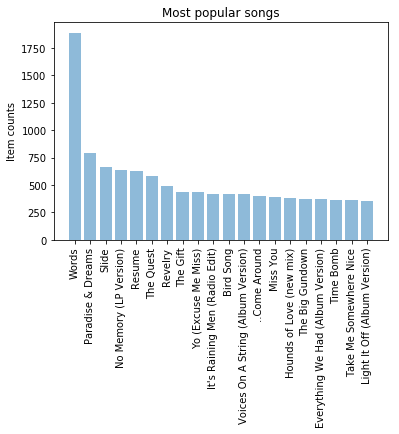

In [36]:
import matplotlib.pyplot as plt

objects = list(popular_songs_top20['title'])
y_pos = np.arange(len(objects))
performence = list(popular_songs_top20['listen_count'])

plt.bar(y_pos,performence,align = 'center',alpha = 0.5)
plt.xticks(y_pos,objects,rotation = 'vertical')
plt.ylabel('Item counts')
plt.title('Most popular songs')

plt.show()

最受欢迎的release

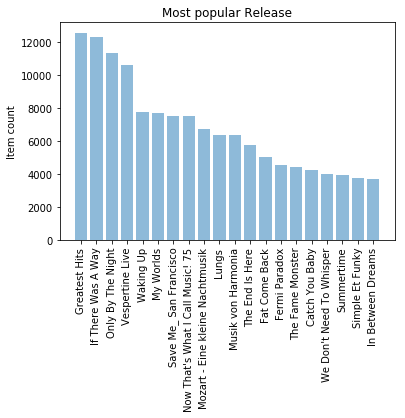

In [37]:
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index()
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_release_top_20['release']))
y_pos = np.arange(len(objects))
performance = list(popular_release_top_20['listen_count'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Release')
 
plt.show()

最受欢迎的歌手

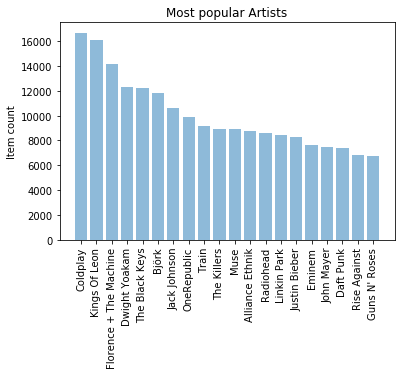

In [38]:
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_artist_top_20['artist_name']))
y_pos = np.arange(len(objects))
performance = list(popular_artist_top_20['listen_count'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Artists')
 
plt.show()

用户播放量的分布

In [39]:
user_song_count_distibution = triplet_dataset_sub_song_merged.groupby('user')['title'].count().reset_index().sort_values(
by = 'title',ascending = False)
user_song_count_distibution.title.describe()

count    9999.000000
mean       49.815882
std        44.772202
min         1.000000
25%        22.000000
50%        37.000000
75%        62.000000
max       695.000000
Name: title, dtype: float64

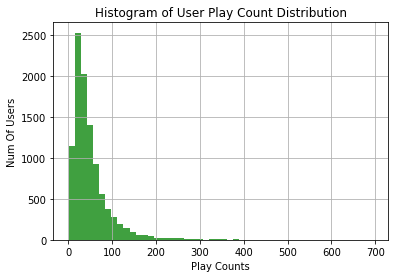

In [40]:
x = user_song_count_distibution.title
plt.hist(x,50,facecolor = 'green',alpha = 0.75)
plt.xlabel('Play Counts')
plt.ylabel('Num Of Users')
plt.title('Histogram of User Play Count Distribution')
plt.grid(True)

plt.show()

# 推荐系统

In [41]:
import Recommenders as Recommenders
from sklearn.model_selection import train_test_split

简单暴力，排行榜单推荐（适合解决冷启动问题）

In [42]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data,test_data = train_test_split(triplet_dataset_sub_song_merged_set,test_size = 0.4,random_state = 0)

In [43]:
train_data.head()

,user,song,listen_count,title,song_id,release,artist_name,year
386897,4fad5d1aab6e6c643cb32ad6d889c74fab11d859,SOTASGN12AC9075A8F,1,Stuck In The Moment,SOTASGN12AC9075A8F,My Worlds,Justin Bieber,2010
124377,89180a2679679acf94bd43ac6935df875e237120,SOSNTPY12A6D4F8471,4,Vertigo,SOSNTPY12A6D4F8471,Vertigo,U2,2004
84052,7cea4b3a0b25a1fa828d7bfe86cb11ae13e544f3,SOANQFY12AB0183239,1,Uprising,SOANQFY12AB0183239,Uprising,Muse,0
193599,283882c3d18ff2ad0e17124002ec02b847d06e9a,SOOALOT12A8C13ABD9,56,En Glad Calypso Om Våren (Live '62),SOOALOT12A8C13ABD9,En Stol På Tegnér,Olle Adolphson,0
227686,991a4f49ffdbc8920f47695f62cd657053f90d62,SOFRQTD12A81C233C0,1,Sehr kosmisch,SOFRQTD12A81C233C0,Musik von Harmonia,Harmonia,0


In [44]:
train_data.shape

(298865, 8)

In [45]:
def creat_popular_recommendation(train_data,user_id,item_id):
    train_data_grouped = train_data.groupby(item_id).agg({user_id:'count'}).reset_index()
    train_data_grouped.rename(columns = {user_id:'score'},inplace = True)
    
    train_data_sort = train_data_grouped.sort_values('score',ascending = False)
    
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending = False,method = 'first')
    
    popularity_recommendations = train_data_sort.head(n = 20)
    
    return popularity_recommendations

In [46]:
recommendations = creat_popular_recommendation(train_data,'user','title')

In [47]:
recommendations

,title,score,Rank
13182,Sehr kosmisch,869,1.0
3851,Dog Days Are Over (Radio Edit),802,2.0
18293,You're The One,670,3.0
16879,Undo,657,4.0
13161,Secrets,624,5.0
12544,Revelry,620,6.0
6666,Horn Concerto No. 4 in E flat K495: II. Romanc...,553,7.0
6472,Hey_ Soul Sister,515,8.0
5067,Fireflies,512,9.0
16388,Tive Sim,481,10.0


# 基于歌曲相似度的推荐

选择一小部分歌曲来试验

In [48]:
song_count_subset = song_count_df.head(n = 500)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [49]:
del (triplet_dataset_sub_song_merged_sub['song_id'])
triplet_dataset_sub_song_merged_sub.head()

,user,song,listen_count,title,release,artist_name,year
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
14,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
19,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOIZAZL12A6701C53B,5,I'll Be Missing You (Featuring Faith Evans & 1...,No Way Out,Puff Daddy,0
22,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOKRIMP12A6D4F5DA3,5,I?'m A Steady Rollin? Man,Diggin' Deeper Volume 7,Robert Johnson,0


In [50]:
train_data,test_data = train_test_split(triplet_dataset_sub_song_merged_sub,test_size = 0.4,random_state = 0)
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data,'user','title')
user_id = list(train_data.user)[7]
user_item = is_model.get_user_items(user_id)

In [51]:
is_model.recommend(user_id)

No. of unique songs for the user: 8
no. of unique songs in the training set: 498
Non zero values in cooccurence_matrix :3491


,user_id,song,score,rank
0,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Undo,0.102700,1
1,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Revelry,0.085968,2
2,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Invalid,0.077366,3
3,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Gears,0.076563,4
4,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.068818,5
5,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Sinisten tähtien alla,0.065155,6
6,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Canada,0.063476,7
7,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Sincerité Et Jalousie,0.062651,8
8,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,16 Candles,0.062547,9
9,2b05b8168397ff62eaae7f4acab25d9feaaa07bd,Creil City,0.059842,10


先计算歌曲被当前用户播放量 / 用户播放总量 当做分值

In [52]:
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user','listen_count']].groupby('user').sum().reset_index()
triplet_dataset_sub_song_merged_sum_df.rename(columns={'listen_count':'total_listen_count'},inplace=True)
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged,triplet_dataset_sub_song_merged_sum_df)
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,song_id,release,artist_name,year,total_listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,SOAKIMP12A8C130995,Thicker Than Water,Jack Johnson,0,94
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,SOAPDEY12A81C210A9,To Die For,Billy Preston,1974,94
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,SOBBMDR12A8C13253B,Flamenco Para Niños,Paco De Lucia,1976,94
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,SOBFNSP12AF72A0E22,Under Cold Blue Stars,Josh Rouse,2002,94
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,12 segundos de oscuridad,SOBSUJE12A6D4F8CF5,10 + Downloaded,Jorge Drexler,2006,94


In [53]:
triplet_dataset_sub_song_merged['fractional_play_count'] = triplet_dataset_sub_song_merged['listen_count']/triplet_dataset_sub_song_merged['total_listen_count']

In [54]:
triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.user =='d6589314c0a9bcbca4fee0c93b14bc402363afea'][['user','song','listen_count','fractional_play_count']].head()

,user,song,listen_count,fractional_play_count
274,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,0.036697
275,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,0.003058
276,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,0.003058
277,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,0.003058
278,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,0.021407


In [55]:
from scipy.sparse import coo_matrix

In [56]:
small_set = triplet_dataset_sub_song_merged
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.user.drop_duplicates().reset_index()
user_codes.rename(columns = {'index':'user_index'},inplace = True)
song_codes.rename(columns = {'index':'song_index'},inplace=True)
user_codes['so_index_value'] = list(user_codes.index)
song_codes['us_index_value'] = list(song_codes.index)

In [57]:
small_set = pd.merge(small_set,user_codes,how = 'left')
small_set = pd.merge(small_set,song_codes,how =  'left')

In [58]:
small_set.head()

,user,song,listen_count,title,song_id,release,artist_name,year,total_listen_count,fractional_play_count,user_index,so_index_value,song_index,us_index_value
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,SOAKIMP12A8C130995,Thicker Than Water,Jack Johnson,0,94,0.010638,0,0,0,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,SOAPDEY12A81C210A9,To Die For,Billy Preston,1974,94,0.010638,0,0,0,0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,SOBBMDR12A8C13253B,Flamenco Para Niños,Paco De Lucia,1976,94,0.021277,0,0,0,0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,SOBFNSP12AF72A0E22,Under Cold Blue Stars,Josh Rouse,2002,94,0.010638,0,0,0,0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,12 segundos de oscuridad,SOBSUJE12A6D4F8CF5,10 + Downloaded,Jorge Drexler,2006,94,0.021277,0,0,0,0


建立用户、歌曲和得分值的矩阵

In [59]:
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']]
data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
clo_array = mat_candidate.so_index_value.values

data_sparse = coo_matrix((data_array,(row_array,clo_array)),dtype=float)

In [60]:
data_sparse.shape

(9999, 9999)

In [61]:
data_sparse

<9999x9999 sparse matrix of type '<class 'numpy.float64'>'
	with 498109 stored elements in COOrdinate format>

In [62]:
user_codes[user_codes.user =='b80344d063b5ccb3212f76538f3d9e43d87dca9e']

,user_index,user,so_index_value
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,0


In [63]:
import math as mt
from scipy.sparse.linalg import *
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

In [64]:
def compute_svd(urm,k):
    U,s,Vt = svds(urm,k)
    
    dim = (len(s),len(s))
    S = np.zeros(dim,dtype=np.float32)
    for i in range(0,len(s)):
        S[i,i] = mt.sqrt(s[i])
    
    U = csc_matrix(U,dtype=np.float32)
    S = csc_matrix(S,dtype=np.float32)
    Vt = csc_matrix(Vt,dtype=np.float32)
    
    return U,S,Vt

def compute_estimate_matrix(urm,U,S,Vt,Utest,K,best):
    rightItem = S*Vt
    max_recommendation = 50
    estimatedRatings = np.zeros(shape = (MAX_UID,MAX_PID),dtype=np.float16)
    recommendRatings = np.zeros(shape=(MAX_UID,max_recommendation),dtype=np.float16)
    for Usertest in Utest:
        prob = U[Usertest,:]*rightItem
        estimatedRatings[Usertest,:] = prob.todense()
        recommendRatings[Usertest,:] = (-estimatedRatings[Usertest,:]).argsort()[:max_recommendation]
    return recommendRatings

In [65]:
k = 50
urm = data_sparse

MAX_UID = urm.shape[0]
MAX_PID = urm.shape[1]

U,S,Vt = compute_svd(urm,k)

In [69]:
Utest = [4,5,6,7]

Utest_recommended_items = compute_estimate_matrix(urm,U,S,Vt,Utest,k,True)

In [70]:
for user in Utest:
    print("Recommendation for user with user id {}". format(user))
    rank_value = 1
    for i in Utest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title','artist_name']]
        print("The number {} recommended song is {} BY {}".format(rank_value, list(song_details['title'])[0],list(song_details['artist_name'])[0]))
        rank_value+=1

Recommendation for user with user id 4
The number 1 recommended song is Dirty Dishes BY Deer Tick
The number 2 recommended song is Hallelujah (Album Version) BY Paramore
The number 3 recommended song is Everyone Like Me BY Thousand Foot Krutch
The number 4 recommended song is Bankrupt On Selling BY Modest Mouse
The number 5 recommended song is Stay Awhile BY Dusty Springfield
The number 6 recommended song is Walkin' On The Sun BY Smash Mouth
The number 7 recommended song is Uptown Girl BY Me First And The Gimme Gimmes
The number 8 recommended song is Criminal BY Gotan Project
The number 9 recommended song is Mercedes Benz - Remix BY Janis Joplin Vs Medicine Head
The number 10 recommended song is The Perfect Kiss BY New Order
Recommendation for user with user id 5
The number 1 recommended song is Halo BY The Pussycat Dolls
The number 2 recommended song is The Baby Screams BY The Cure
The number 3 recommended song is Hallelujah (Album Version) BY Paramore
The number 4 recommended song is